In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates
import matplotlib.ticker as mticks

In [4]:
df = pd.read_csv('Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [5]:
#Filter the 4 largest cities into a new dataframe
largest = df[df['SizeRank'] < 4]
largest

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [10]:
melted = pd.melt(largest,id_vars=['RegionID','SizeRank',
                                      'RegionName','RegionType',
                                      'StateName','State','Metro',
                                      'CountyName'],
                                       value_name='HouseValue',var_name="Date")
melted


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HouseValue
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [11]:
# Convert Date cloumn to datetime objects
melted['Date'] = pd.to_datetime(melted['Date'])
#set date time index
melted = melted.set_index("Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HouseValue
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [12]:
ts = melted.groupby('RegionName').resample("M").asfreq()
ts

RegionID  SizeRank RegionName RegionType StateName  \
RegionName Date                                                             
Chicago    2000-01-31     17426         3    Chicago       city        IL   
           2000-02-29     17426         3    Chicago       city        IL   
           2000-03-31     17426         3    Chicago       city        IL   
           2000-04-30     17426         3    Chicago       city        IL   
           2000-05-31     17426         3    Chicago       city        IL   
...                         ...       ...        ...        ...       ...   
New York   2022-05-31      6181         0   New York       city        NY   
           2022-06-30      6181         0   New York       city        NY   
           2022-07-31      6181         0   New York       city        NY   
           2022-08-31      6181         0   New York       city        NY   
           2022-09-30      6181         0   New York       city        NY   

                      State                                  Metro  \
RegionName Date                                                      
Chicago    2000-01-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-02-29    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-03-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-04-30    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-05-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
...                     ...                                    ...   
New York   2022-05-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-06-30    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-07-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-08-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-09-30    NY  New York-Newark-Jersey City, NY-NJ-PA   

                          CountyName  HouseValue  
RegionName Date                                   
Chicago    2000-01-31    Cook County    166139.0  
           2000-02-29    Cook County    166536.0  
           2000-03-31    Cook County    167368.0  
           2000-04-30    Cook County    168826.0  
           2000-05-31    Cook County    170499.0  
...                              ...         ...  
New York   2022-05-31  Queens County    768797.0  
           2022-06-30  Queens County    773944.0  
           2022-07-31  Queens County    777692.0  
           2022-08-31  Queens County    779960.0  
           2022-09-30  Queens County    781622.0  

[1092 rows x 9 columns]

# Part 2

Plot the home values for all 4 cities

In [13]:
unstacked = ts.unstack(0)
unstacked

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
Date                                                                            
2000-01-31    17426   39051       12447     6181        3       2           1   
2000-02-29    17426   39051       12447     6181        3       2           1   
2000-03-31    17426   39051       12447     6181        3       2           1   
2000-04-30    17426   39051       12447     6181        3       2           1   
2000-05-31    17426   39051       12447     6181        3       2           1   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-31    17426   39051       12447     6181        3       2           1   
2022-06-30    17426   39051       12447     6181        3       2           1   
2022-07-31    17426   39051       12447     6181        3       2           1   
2022-08-31    17426   39051       12447     6181        3       2           1   
2022-09-30    17426   39051       12447     6181        3       2           1   

                    RegionName           ...  \
RegionName New York    Chicago  Houston  ...   
Date                                     ...   
2000-01-31        0    Chicago  Houston  ...   
2000-02-29        0    Chicago  Houston  ...   
2000-03-31        0    Chicago  Houston  ...   
2000-04-30        0    Chicago  Houston  ...   
2000-05-31        0    Chicago  Houston  ...   
...             ...        ...      ...  ...   
2022-05-31        0    Chicago  Houston  ...   
2022-06-30        0    Chicago  Houston  ...   
2022-07-31        0    Chicago  Houston  ...   
2022-08-31        0    Chicago  Houston  ...   
2022-09-30        0    Chicago  Houston  ...   

                                         Metro  \
RegionName                         Los Angeles   
Date                                             
2000-01-31  Los Angeles-Long Beach-Anaheim, CA   
2000-02-29  Los Angeles-Long Beach-Anaheim, CA   
2000-03-31  Los Angeles-Long Beach-Anaheim, CA   
2000-04-30  Los Angeles-Long Beach-Anaheim, CA   
2000-05-31  Los Angeles-Long Beach-Anaheim, CA   
...                                        ...   
2022-05-31  Los Angeles-Long Beach-Anaheim, CA   
2022-06-30  Los Angeles-Long Beach-Anaheim, CA   
2022-07-31  Los Angeles-Long Beach-Anaheim, CA   
2022-08-31  Los Angeles-Long Beach-Anaheim, CA   
2022-09-30  Los Angeles-Long Beach-Anaheim, CA   

                                                    CountyName                 \
RegionName                               New York      Chicago        Houston   
Date                                                                            
2000-01-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-02-29  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-03-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-04-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-05-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
...                                           ...          ...            ...   
2022-05-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-06-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-07-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-08-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-09-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   

                                              HouseValue            \
RegionName         Los Angeles       New York    Chicago   Houston   
Date                                                                 
2000-01-31  Los Angeles County  Queens County   166139.0  109068.0   
2000-02-29  Los Angeles County  Queens County   166536.0  109079.0   
2000-03-31  Los A

In [14]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

fmt_thous = mticks.FuncFormatter(thousands)

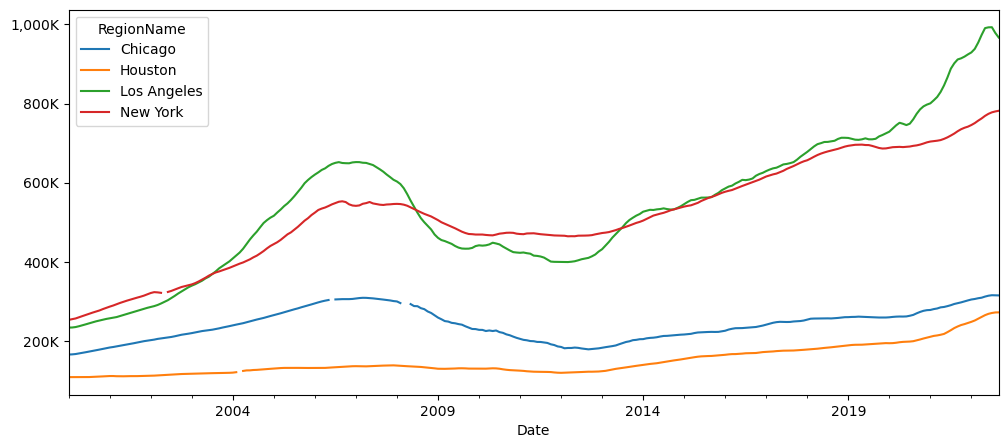

In [16]:
ax = unstacked['HouseValue'].plot(figsize=(12,5))
ax.yaxis.set_major_formatter(fmt_thous)


### 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [20]:
show= unstacked['HouseValue']
show.loc['2008-12-31']

RegionName
Chicago        265306.0
Houston        131283.0
Los Angeles    469294.0
New York       510309.0
Name: 2008-12-31 00:00:00, dtype: float64

New York had highest home value at the end of 2008; Houston had the least home value.

### 2) How much did the home values change from November 2008 to December 2008 ?

In [21]:
diff_value=show.diff()
diff_value.loc['2008-11':'2008-12']

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-30,-3790.0,-942.0,-9074.0,-3281.0
2008-12-31,-5753.0,-964.0,-12611.0,-4458.0
